In [2]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


# Import the CSV Files

In [3]:
import pandas as pd

# Load training data
train_df = pd.read_csv("C:\\Users\\Marie\\Documents\\mnist_train.csv")

# Load test data
test_df = pd.read_csv("C:\\Users\\Marie\\Documents\\mnist_test.csv")



# Inspect the Data

In [4]:
print("Training data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

print("Training data head:")
print(train_df.head())

print("Test data head:")
print(test_df.head())


Training data shape: (60000, 785)
Test data shape: (10000, 785)
Training data head:
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
Test data head:
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ... 

# Prepare Data for Training

In [5]:
train_images = train_df.drop(columns=['label']).values
train_labels = train_df['label'].values

test_images = test_df.drop(columns=['label']).values
test_labels = test_df['label'].values



# Preprocess Data

In [6]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0



# Reshape Data

In [8]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)



# Convert Labels to Categorical

In [11]:
from tensorflow.keras.utils import to_categorical

# Assuming train_labels and test_labels are already defined and hold the label data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)


# Build the CNN Model

In [26]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),  # Input layer to specify input shape
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the Model

In [13]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam()

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the Model

In [14]:
history = model.fit(train_images, train_labels_one_hot, epochs=10, batch_size=128, validation_data=(test_images, test_labels_one_hot))



Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8525 - loss: 0.4947 - val_accuracy: 0.9836 - val_loss: 0.0521
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9816 - loss: 0.0589 - val_accuracy: 0.9880 - val_loss: 0.0357
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9874 - loss: 0.0404 - val_accuracy: 0.9894 - val_loss: 0.0342
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9911 - loss: 0.0289 - val_accuracy: 0.9896 - val_loss: 0.0328
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9935 - loss: 0.0204 - val_accuracy: 0.9912 - val_loss: 0.0273
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9951 - loss: 0.0161 - val_accuracy: 0.9890 - val_loss: 0.0330
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9965 - loss: 0.0123 - val_accuracy: 0.9918 - val_loss: 0.0253
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9969 - loss: 0.0098 - val_accu

# Evaluate the Model

In [15]:

test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot, verbose=2)
print("Test accuracy:", test_accuracy)


313/313 - 1s - 4ms/step - accuracy: 0.9926 - loss: 0.0268
Test accuracy: 0.9926000237464905


# Visualize Training History

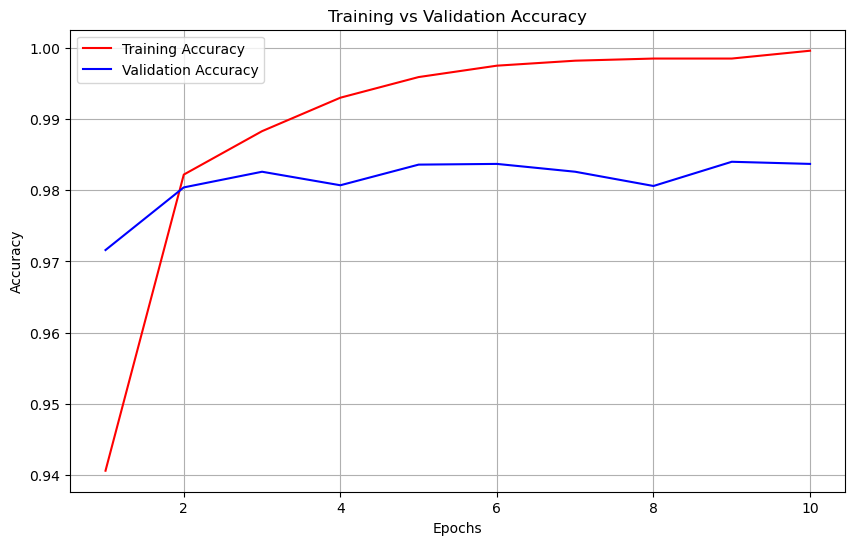

In [17]:
import matplotlib.pyplot as plt

# Define the training and validation accuracy values
training_accuracy_values = [0.9406, 0.9822, 0.9883, 0.9930, 0.9959, 0.9975, 0.9982, 0.9985, 0.9985, 0.9996]
validation_accuracy_values = [0.9716, 0.9804, 0.9826, 0.9807, 0.9836, 0.9837, 0.9826, 0.9806, 0.9840, 0.9837]

# Define the number of epochs
epochs = range(1, len(training_accuracy_values) + 1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy_values, label='Training Accuracy', color='red')
plt.plot(epochs, validation_accuracy_values, label='Validation Accuracy', color='blue')

# Add labels and title
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [18]:
conv_layers = [layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]


In [19]:
filters = [layer.get_weights()[0] for layer in conv_layers]


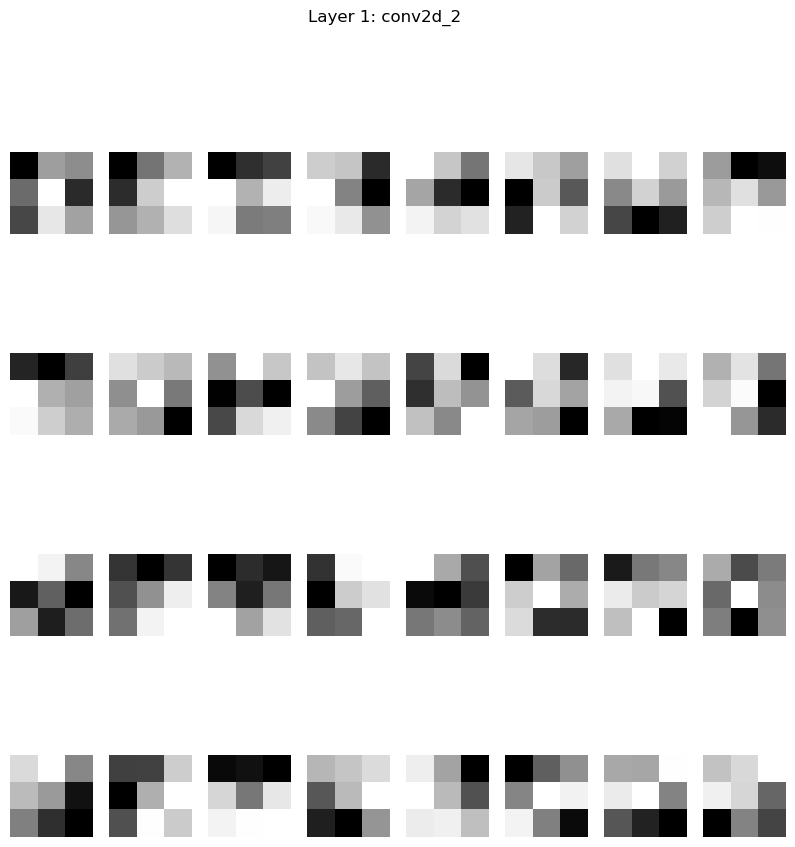

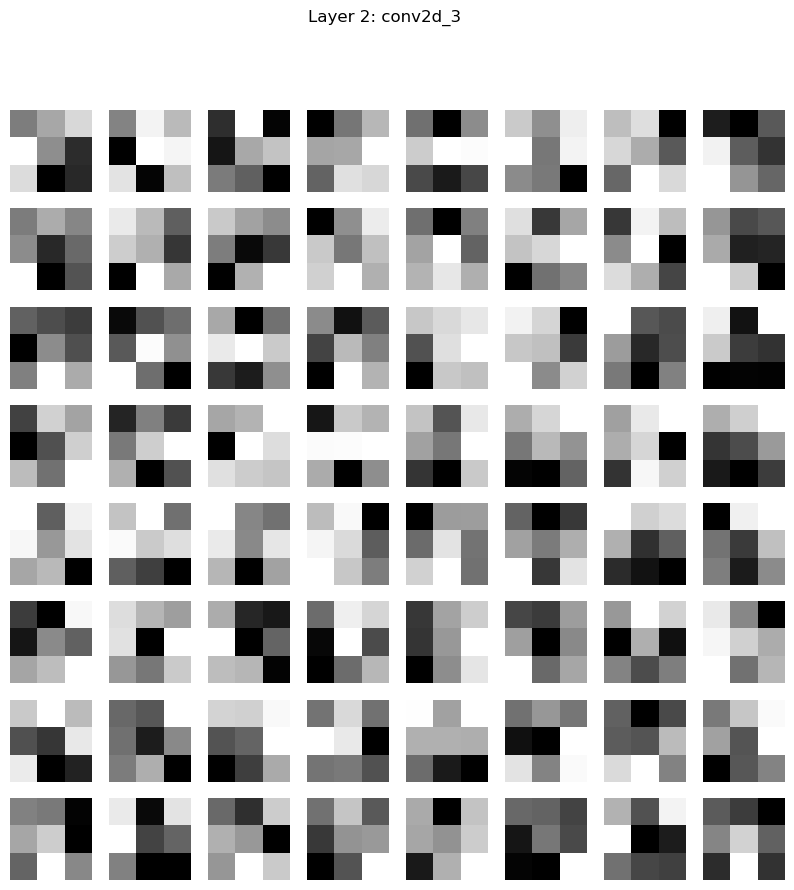

In [24]:
import matplotlib.pyplot as plt

# Plot filters for each convolutional layer
for i, layer in enumerate(conv_layers):
    filter_weights = filters[i]
    num_filters = filter_weights.shape[3]
    plt.figure(figsize=(10, 10))
    for j in range(num_filters):
        plt.subplot(num_filters // 8, 8, j+1)
        plt.imshow(filter_weights[:, :, 0, j], cmap='gray')
        plt.axis('off')
    plt.suptitle(f'Layer {i+1}: {layer.name}')
    plt.show()


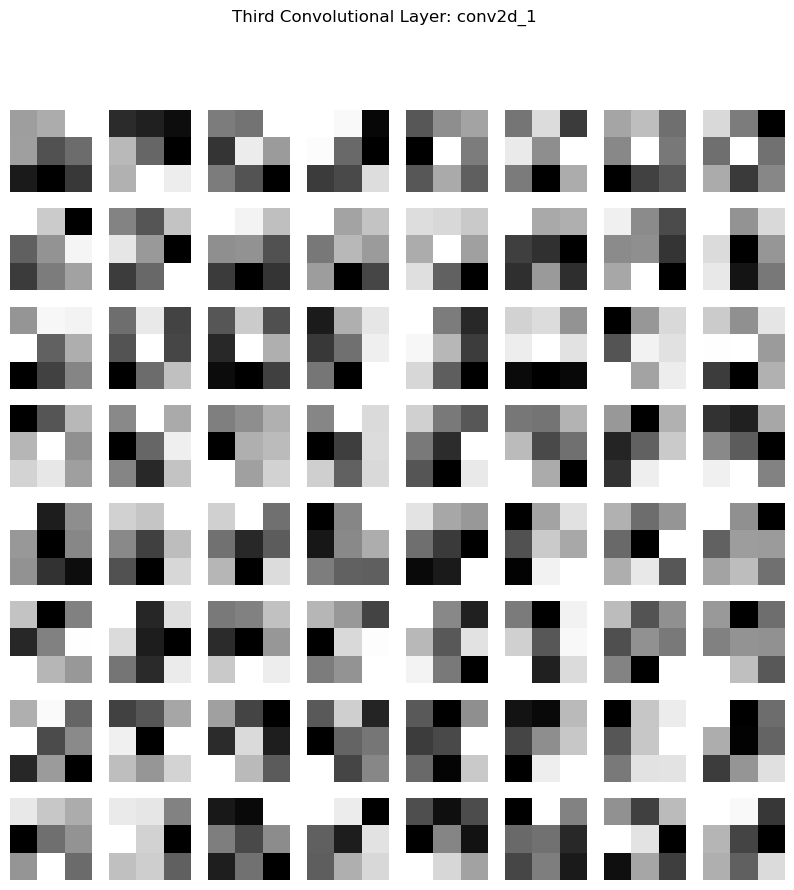

In [20]:
import matplotlib.pyplot as plt

# Get the third convolutional layer
conv_layer = model.layers[2]  # Index starts from 0

# Extract filter weights from the third convolutional layer
filter_weights = conv_layer.get_weights()[0]

# Plot filters for the third convolutional layer
num_filters = filter_weights.shape[3]
plt.figure(figsize=(10, 10))
for j in range(num_filters):
    plt.subplot(num_filters // 8, 8, j+1)
    plt.imshow(filter_weights[:, :, 0, j], cmap='gray')
    plt.axis('off')
plt.suptitle(f'Third Convolutional Layer: {conv_layer.name}')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


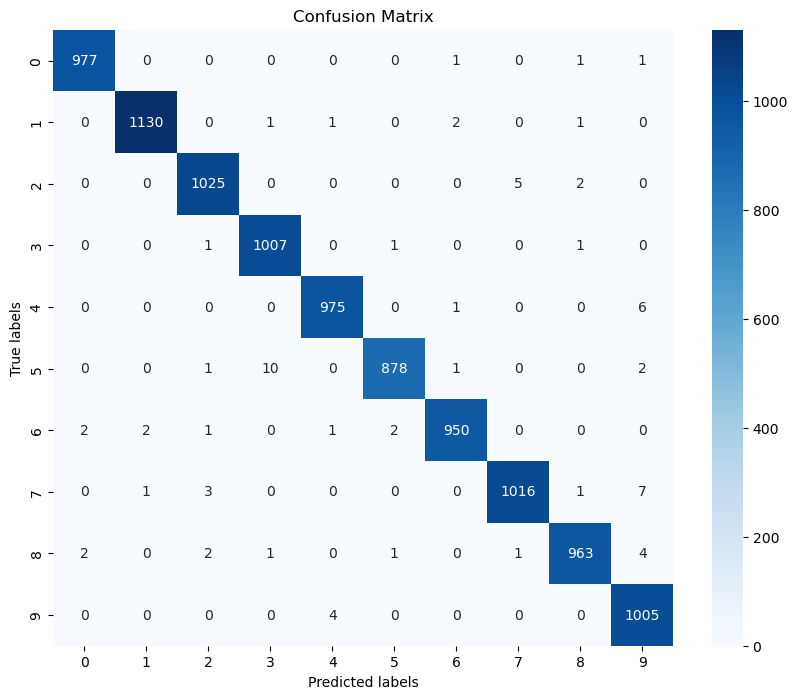

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predicted probabilities for each class
y_pred_probabilities = model.predict(test_images)

# Convert probabilities to predicted labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Generate confusion matrix
confusion_matrix = confusion_matrix(np.argmax(test_labels_one_hot, axis=1), y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [30]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test.argmax(axis=1), y_pred, target_names=[str(i) for i in range(10)])

# Print classification report
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



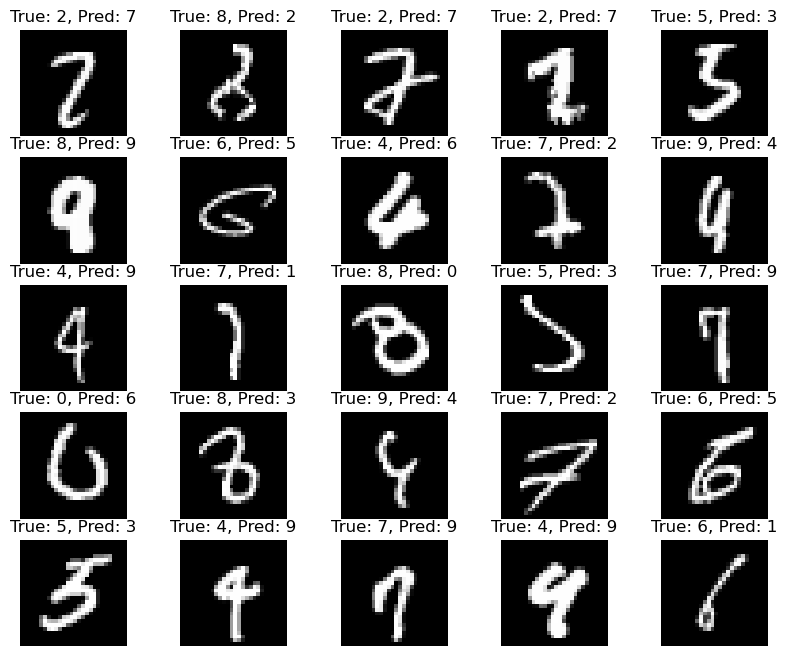

In [30]:
import numpy as np

# Find misclassified images
misclassified_indices = np.where(y_pred != test_labels_one_hot.argmax(axis=1))[0]

# Plot some misclassified images
plt.figure(figsize=(10, 8))
for i, idx in enumerate(misclassified_indices[:25]):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {test_labels_one_hot[idx].argmax()}, Pred: {y_pred[idx]}')
    plt.axis('off')
plt.show()




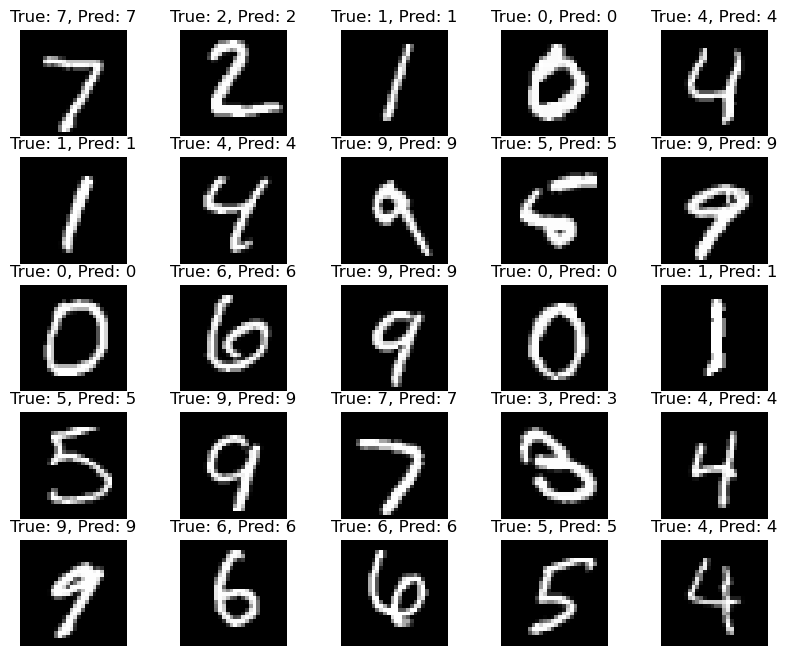

In [33]:
# Find correctly classified images
correctly_classified_indices = np.where(y_pred == test_labels_one_hot.argmax(axis=1))[0]

# Plot some correctly classified images
plt.figure(figsize=(10, 8))
for i, idx in enumerate(correctly_classified_indices[:25]):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {test_labels_one_hot[idx].argmax()}, Pred: {y_pred[idx]}')
    plt.axis('off')
plt.show()

